In [37]:
# === Unigram drafter + Bigram verifier + Prefix-Accept 
import random
from collections import Counter
import matplotlib.pyplot as plt

In [39]:
random.seed(42)

In [40]:
# 1) 코퍼스 & 토큰
corpus = "the wolf ran into the forest"
tokens = corpus.lower().split()
print("tokens:", tokens)

tokens: ['the', 'wolf', 'ran', 'into', 'the', 'forest']


In [41]:
# 1) 유니그램(작은 모델: 초안 생성용)
unigram_counts = Counter(tokens)
unigram_vocab  = list(unigram_counts.keys())
unigram_weights = [unigram_counts[w] for w in unigram_vocab]

In [42]:
def draft_tokens_unigram(k=3):
    # 자주 나온 단어일수록 뽑힐 확률 ↑
    return random.choices(unigram_vocab, weights=unigram_weights, k=k)

In [43]:
print(tokens)

['the', 'wolf', 'ran', 'into', 'the', 'forest']


In [44]:
# 4) 확인 + 그래프
print("단어들:", unigram_vocab)
print("가중치:", unigram_weights)
print("샘플 draft:", draft_tokens_unigram(k=5))

단어들: ['the', 'wolf', 'ran', 'into', 'forest']
가중치: [2, 1, 1, 1, 1]
샘플 draft: ['ran', 'the', 'the', 'the', 'into']


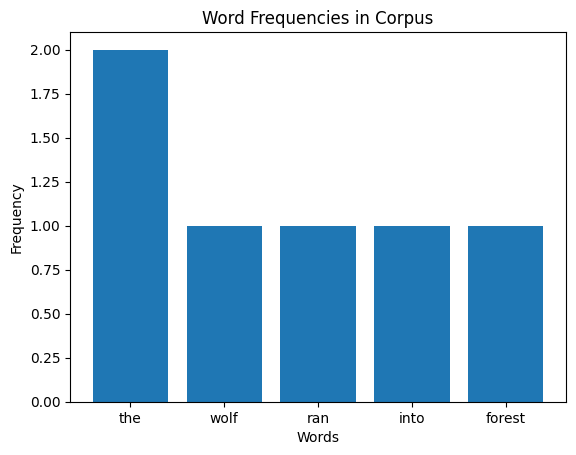

In [45]:
plt.bar(unigram_vocab, unigram_weights)
plt.title("Word Frequencies in Corpus")
plt.xlabel("Words"); plt.ylabel("Frequency")
plt.show()

In [32]:
#바이그램(큰 모델용): 직전 단어 → 다음 단어 최빈값

In [33]:
from collections import defaultdict, Counter

In [46]:
# 2) 바이그램(큰 모델: 검증용) — 네가 준 로직을 안전하게 보완(get 사용)
#    #바이그램(큰 모델용): 직전 단어 → 다음 단어 최빈값
bigram_next = defaultdict(Counter)
for a, b in zip(tokens, tokens[1:]):
    bigram_next[a][b] += 1

In [48]:
def verify_next_token(prev_word):
    """바이그램 최빈값, 없으면 유니그램 최빈값으로 백오프"""
    dist = bigram_next.get(prev_word)    # get으로 안전 접근(없는 키 생성 방지)
    if dist:
        return dist.most_common(1)[0][0]
    return unigram_counts.most_common(1)[0][0]

print("Bigram verify for 'ran' ->", verify_next_token("ran"))  # 예상: 'into'

Bigram verify for 'ran' -> into


In [49]:
# 3) Prefix-Accept: 맞는 구간까지만 빠르게 채택, 첫 불일치에서 멈춤
def speculative_prefix_accept(prompt_tokens, k=5):
    draft = draft_tokens_unigram(k)
    accepted = []
    prev = prompt_tokens[-1]  # 직전 단어(바이그램 조건)

    for t in draft:
        v = verify_next_token(prev)      # 큰 모델 검증
        if t == v:                       # 일치 → 채택하고 컨텍스트 확장
            accepted.append(t)
            prev = t
        else:                            # 불일치 → 검증 토큰으로 교체하고 종료
            accepted.append(v)
            break

    final = prompt_tokens + accepted
    return draft, accepted, final



In [52]:
# 4) 데모 실행
prompt = ["the", "wolf", "ran"]  # 직전 단어 'ran'이라 'into'가 자연스럽게 이어짐
draft, accepted, final = speculative_prefix_accept(prompt, k=5)

In [53]:
print("\nPrompt   :", " ".join(prompt))
print("Draft    :", draft)
print("Accepted :", accepted)
print("Final    :", " ".join(final))


Prompt   : the wolf ran
Draft    : ['the', 'ran', 'the', 'the', 'ran']
Accepted : ['into']
Final    : the wolf ran into
